# Image Analysis

* Treating images as matrices
* RGB colour space
* Count number of circles in an image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
%matplotlib notebook

<IPython.core.display.Javascript object>


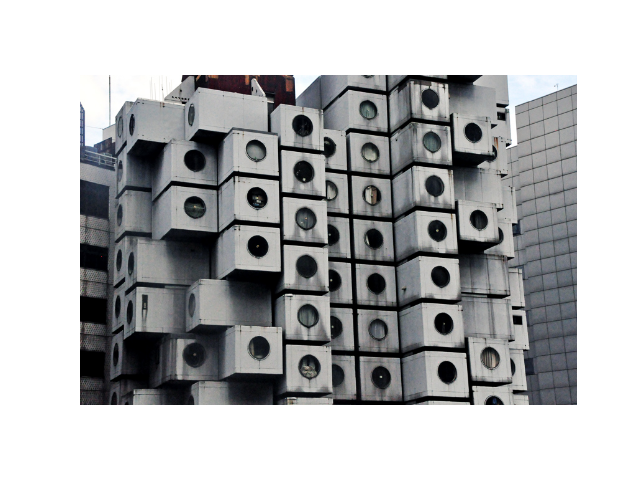

(531, 800, 3)


In [2]:
# Read and display an image with openCV
nagakin = cv2.imread('imgs/nagakin.jpg')
img = nagakin.copy()
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV uses BGR, matplotlib displays in RGB
plt.figure()
plt.axis('off')
plt.imshow(rgb_img)
plt.show()
print(img.shape)

In [3]:
# Grab the blue channel of the image
img.shape
blues = np.zeros(img.shape)
blues[:, :, 2] = img[:, :, 0]

In [5]:
# Find edges in the image
edges = cv2.Canny(img, 100, 300)

<IPython.core.display.Javascript object>


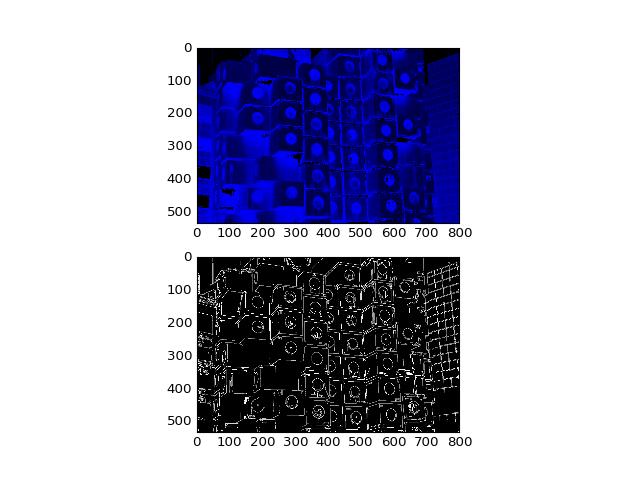

In [193]:
# Plot blue channel and edges
plt.figure()
plt.subplot(2, 1, 1)
plt.imshow(blues)
plt.subplot(2, 1, 2)
plt.imshow(edges, 'gray')
plt.show()

<IPython.core.display.Javascript object>


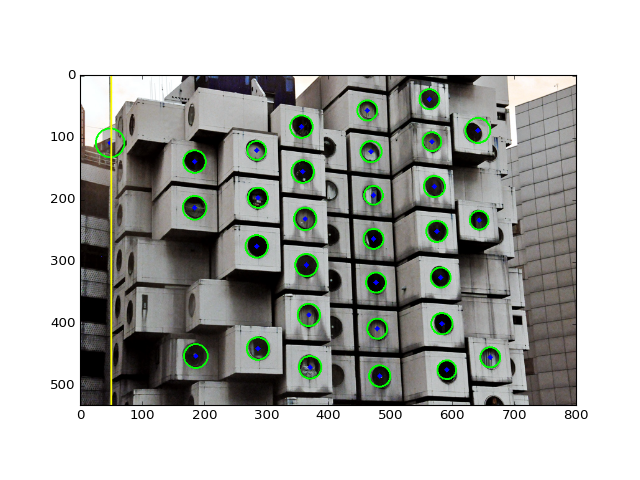

In [4]:
img = nagakin.copy()

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find circles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, minDist=65,
                            param1=300, param2=21, minRadius=14, maxRadius=35)
#print(circles)
circles = np.uint16(np.around(circles))[0, :]

# Plot circles
for i in circles:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.figure()
cv2.line(img, (50, 0), (50, img.shape[1]), (255,255,0), 2)
plt.imshow(img)

<IPython.core.display.Javascript object>


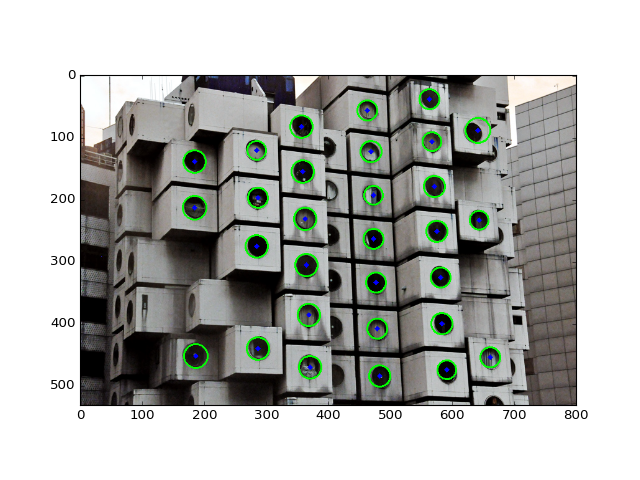

In [5]:
inds = circles[:, 0] > 50
filtered_circles = circles[inds]

img = nagakin.copy()
for i in filtered_circles:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.figure()
plt.imshow(img)

In [197]:
'There are {0} frontal circle windows in the image!'.format(len(filtered_circles))

'There are 30 frontal circle windows in the image!'